In [1]:
# 按行读取2015-08-01.txt的数据
# 2015-08-01.txt的数据格式为：矢量起点，矢量终点
import networkx as nx
import matplotlib.pyplot as plt

cnDict = {}
usDict = {}
f_cn = open('ipip-asn-CN-all.txt', 'r')
f_us = open('ipip-asn-US-all.txt', 'r')
for line in f_cn:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    # cnDict[oneLine[0]] = oneLine[1:3]
    cnDict[oneLine[0]] = int(oneLine[1])+int(oneLine[2])


for line in f_us:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    usDict[oneLine[0]] = int(oneLine[1])+int(oneLine[2])



C:\Users\Anne\AppData\Local\Temp\ipykernel_63684\212460069.py:23: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(cnas_graph, pos=nx.nx_pydot.graphviz_layout(cnas_graph), node_size=node_weight,font_size=7, with_labels=True, arrows=True)


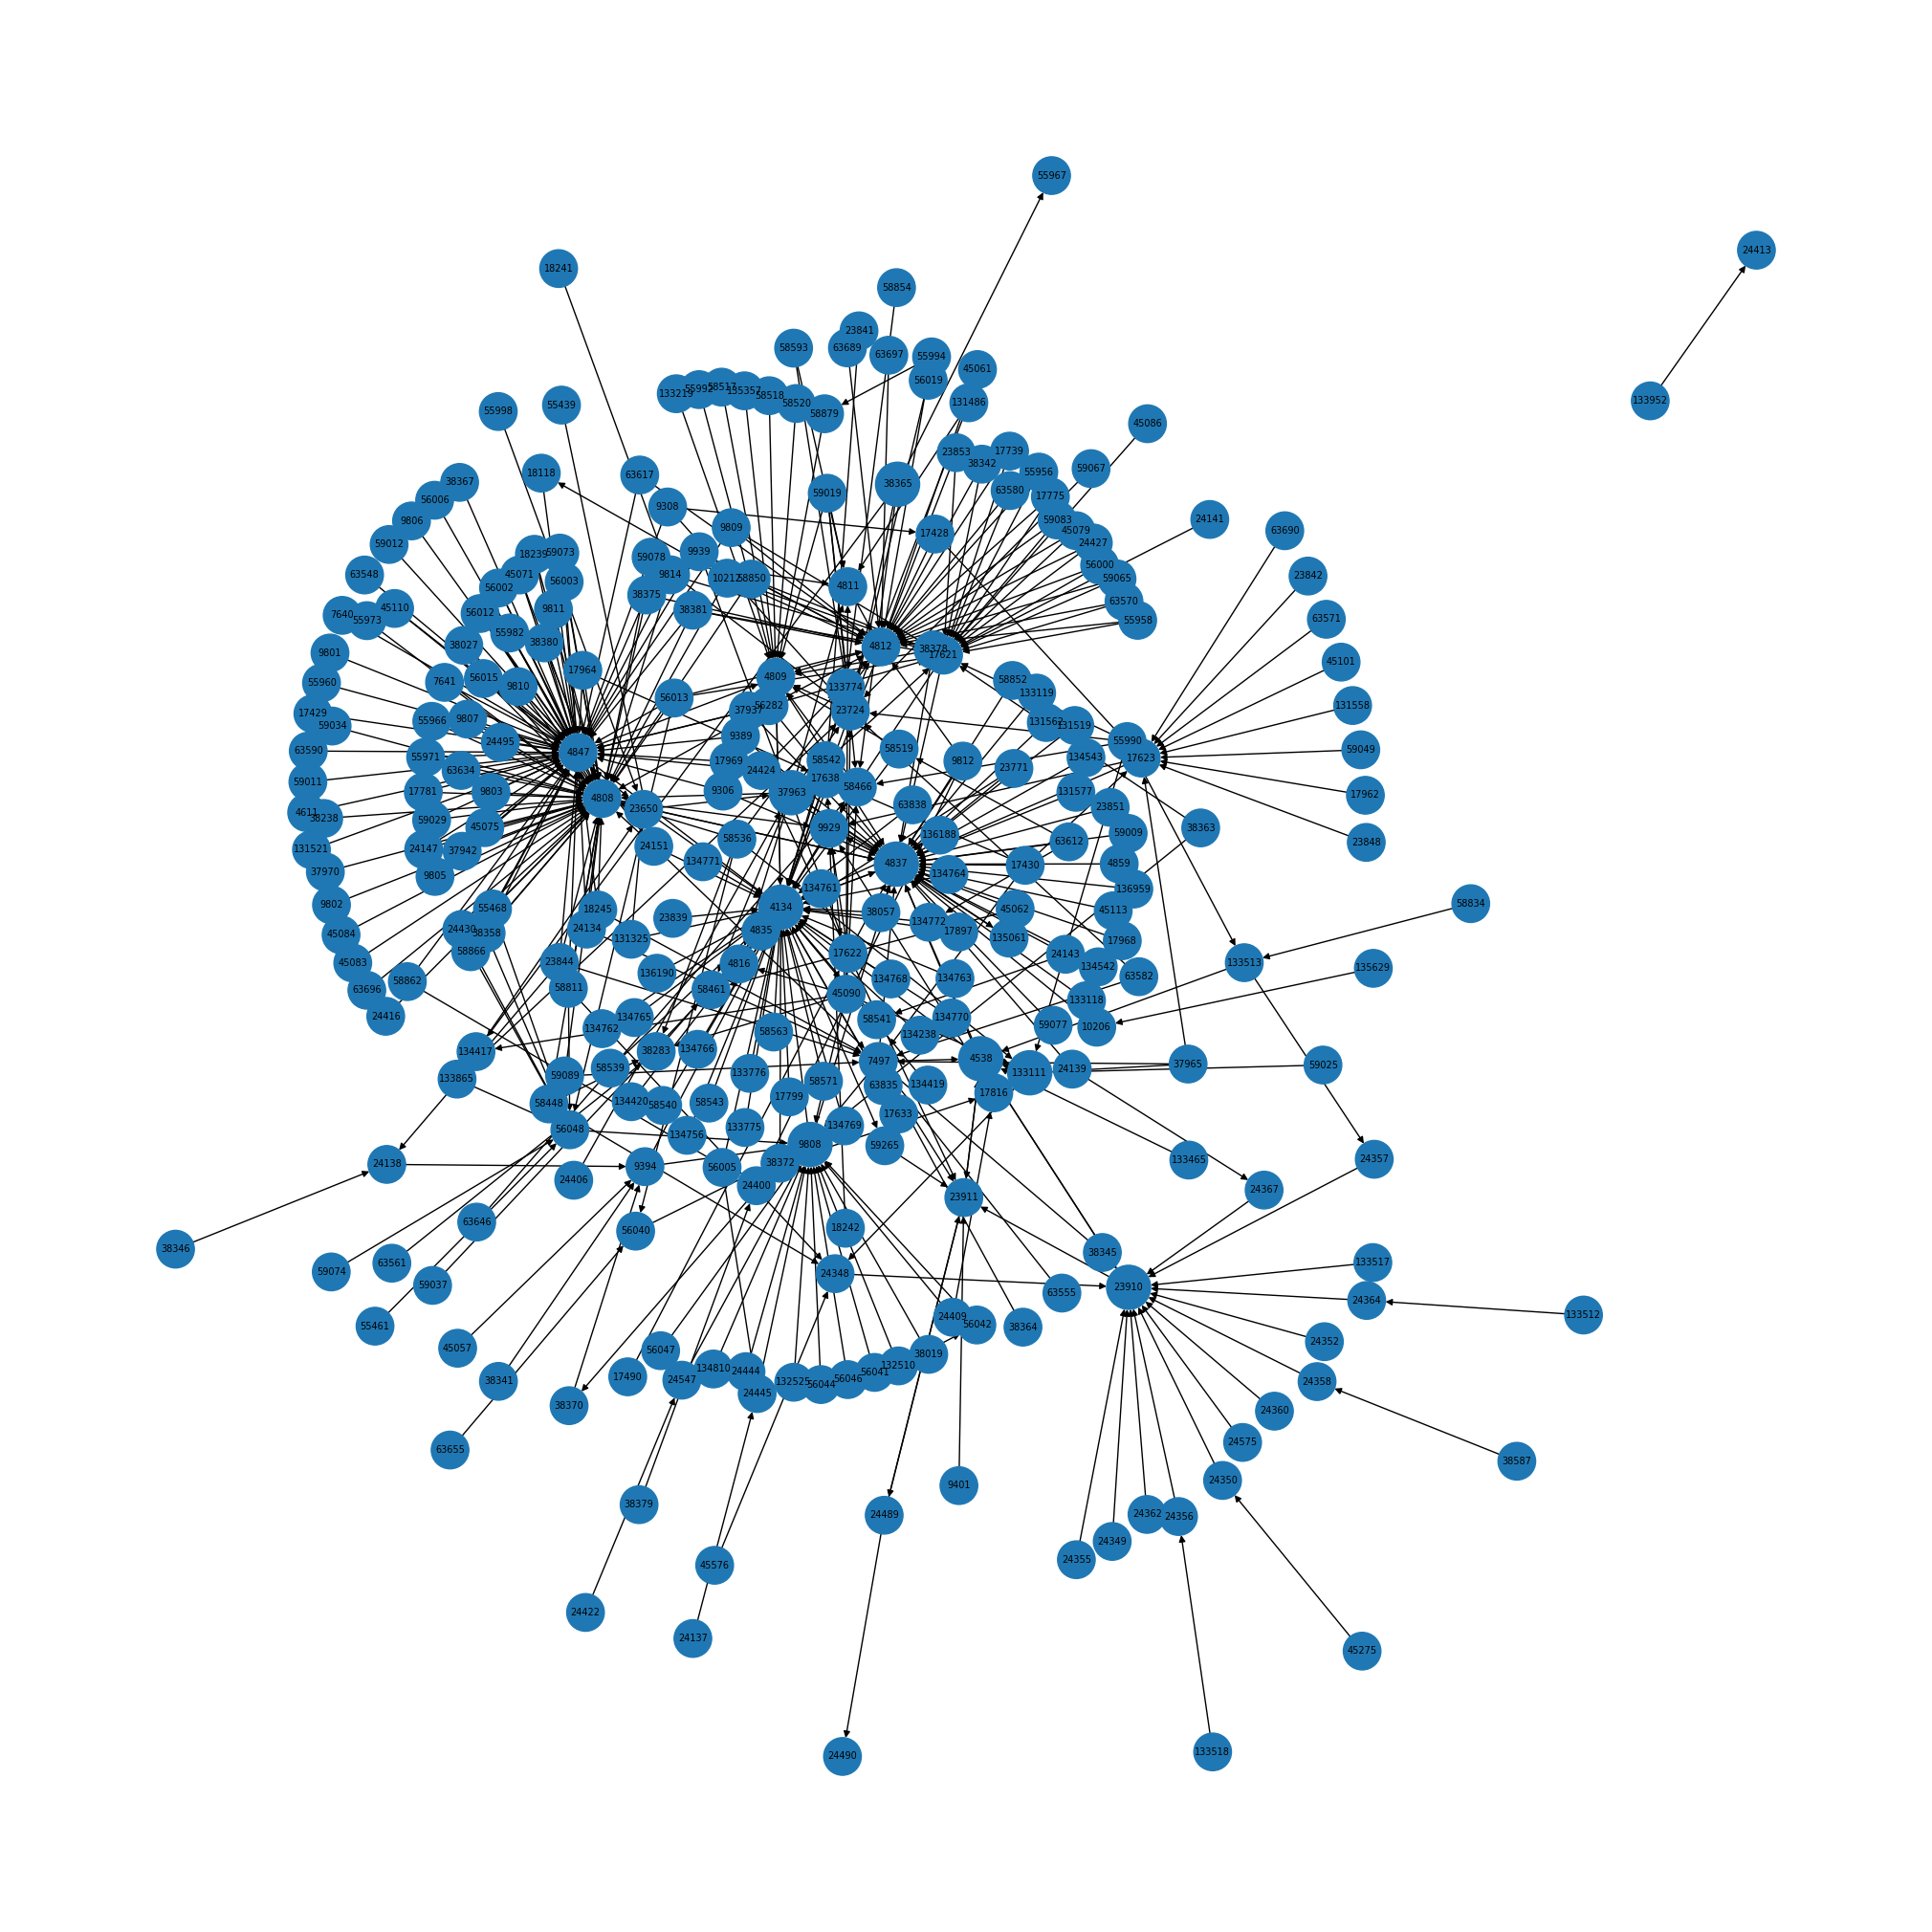

2


In [24]:
# from networkx.drawing.nx_agraph import graphviz_layout
year = "2018"
other = "-04-26"
cnas_graph = nx.DiGraph()
f = open(year+other+'-1min.txt', 'r')
for line in f:
    # print(line)
    oneLine = line.split(',')
    # print(len(oneLine))
    A = oneLine[0].strip()
    B = oneLine[1].strip()
    if len(oneLine) == 2:
        if A in cnDict.keys() and B in cnDict.keys():
            cnas_graph.add_edge(A, B)
            cnas_graph.nodes[A]['weight'] = cnDict[A]
            cnas_graph.nodes[B]['weight'] = cnDict[B]
plt.figure(figsize=(20,20))
node_weight = [max(800,min(1100,v/500000000)) for v in list(nx.get_node_attributes(cnas_graph, 'weight').values())]
# nx.draw(cnas_graph, node_size=node_weight, with_labels=True, arrows=True, pos = nx.spring_layout())
# pos = nx.spring_layout(cnas_graph,scale=100)
# pos = nx.kamada_kawai_layout(cnas_graph,scale=100)
# pos = nx.nx_pydot.graphviz_layout(cnas_graph, prog='dot')
nx.draw(cnas_graph, pos=nx.nx_pydot.graphviz_layout(cnas_graph), node_size=node_weight,font_size=7, with_labels=True, arrows=True)

# nx.draw(cnas_graph, pos=nx.nx_pydot.graphviz_layout(cnas_graph), font_size=7, with_labels=True, arrows=True)

# 显示图形
plt.savefig('CN-Ipv6-'+year+other+'-bgpbreak.png')
plt.show()
print(2)
L = []
for e in cnas_graph.degree():
    L.append(e)
L.sort(key=lambda x:x[1], reverse=True)
# for e in L:
#     print(e[0], e[1])
with open(year+other+'-CN-all-info.txt', 'w') as fw:
    # f = open('2023-08-01-info.txt', 'w')
    fw.write("节点总数:" + str(cnas_graph.number_of_nodes()) + '\n')
    fw.write("边总数:" + str(cnas_graph.number_of_edges()) + '\n')
    fw.write("平均聚类系数(average clustering): " + str(nx.average_clustering(cnas_graph)) + '\n')
    fw.write("网络传递性(transitivity): " + str(nx.transitivity(cnas_graph)) + '\n')
    fw.write("节点的度: " + '\n')
    for e in L:
        fw.write(str(e[0]) + ' ' + str(e[1]) + '\n')

In [26]:
# from networkx.drawing.nx_agraph import graphviz_layout
year = "2018"
other = "-04-24"
usas_graph = nx.DiGraph()
f = open(year+other+'-1min.txt', 'r')
for line in f:
    # print(line)
    oneLine = line.split(',')
    # print(len(oneLine))
    A = oneLine[0].strip()
    B = oneLine[1].strip()
    if len(oneLine) == 2:
        if A in usDict.keys() and B in usDict.keys():
            usas_graph.add_edge(A, B)
            usas_graph.nodes[A]['weight'] = usDict[A]
            usas_graph.nodes[B]['weight'] = usDict[B]
plt.figure(figsize=(30,30))
node_weight = [max(800,min(1100,v/500000000)) for v in list(nx.get_node_attributes(usas_graph, 'weight').values())]
nx.draw(usas_graph, pos=nx.nx_pydot.graphviz_layout(usas_graph), node_size=node_weight,font_size=7, with_labels=True, arrows=True)

# nx.draw(usas_graph, pos=nx.nx_pydot.graphviz_layout(usas_graph), font_size=7, with_labels=True, arrows=True)

# 显示图形
plt.savefig('US-Ipv6-'+year+other+'-bgpbreak.png')
plt.show()
print(2)
L = []
for e in usas_graph.degree():
    L.append(e)
L.sort(key=lambda x:x[1], reverse=True)
# for e in L:
#     print(e[0], e[1])
with open(year+other+'-US-all-info.txt', 'w') as fw:
    # f = open('2023-08-01-info.txt', 'w')
    fw.write("节点总数:" + str(usas_graph.number_of_nodes()) + '\n')
    fw.write("边总数:" + str(usas_graph.number_of_edges()) + '\n')
    fw.write("平均聚类系数(average clustering): " + str(nx.average_clustering(usas_graph)) + '\n')
    fw.write("网络传递性(transitivity): " + str(nx.transitivity(usas_graph)) + '\n')
    fw.write("节点的度: " + '\n')
    for e in L:
        fw.write(str(e[0]) + ' ' + str(e[1]) + '\n')

C:\Users\Anne\AppData\Local\Temp\ipykernel_63684\973185016.py:19: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(usas_graph, pos=nx.nx_pydot.graphviz_layout(usas_graph), node_size=node_weight,font_size=7, with_labels=True, arrows=True)


In [ ]:
# from networkx.drawing.nx_agraph import graphviz_layout
year = "2021"
other = "-08-01"
cn6as_graph = nx.DiGraph()
f = open(year+other+'.txt', 'r')
for line in f:
    # print(line)
    oneLine = line.split(',')
    # print(len(oneLine))
    A = oneLine[0].strip()
    B = oneLine[1].strip()
    if len(oneLine) == 2:
        if A in cnDict6.keys() and B in cnDict6.keys():
            cn6as_graph.add_edge(A, B)
            cn6as_graph.nodes[A]['weight'] = cnDict6[A]
            cn6as_graph.nodes[B]['weight'] = cnDict6[B]
plt.figure(figsize=(40,40))
node_weight = [max(500,v/1000000000) for v in list(nx.get_node_attributes(cn6as_graph, 'weight').values())]
nx.draw(cn6as_graph, pos=nx.nx_pydot.graphviz_layout(cn6as_graph), node_size=node_weight,font_size=8, with_labels=False, arrows=True)
print(1)
# 显示图形
plt.savefig('CN-Ipv6-'+year+'.png')
plt.show()
print(2)
L = []
for e in cn6as_graph.degree():
    L.append(e)
L.sort(key=lambda x:x[1], reverse=True)
# for e in L:
#     print(e[0], e[1])
with open(year+other+'-CN-info.txt', 'w') as fw:
    # f = open('2023-08-01-info.txt', 'w')
    fw.write("节点总数:" + str(cn6as_graph.number_of_nodes()) + '\n')
    fw.write("边总数:" + str(cn6as_graph.number_of_edges()) + '\n')
    fw.write("平均聚类系数(average clustering): " + str(nx.average_clustering(cn6as_graph)) + '\n')
    fw.write("网络传递性(transitivity): " + str(nx.transitivity(cn6as_graph)) + '\n')
    fw.write("节点的度: " + '\n')
    for e in L:
        fw.write(str(e[0]) + ' ' + str(e[1]) + '\n')

    # print("节点总数:", us4as_graph.number_of_nodes())
    # print("边总数:", us4as_graph.number_of_edges())
    # print("平均聚类系数(average clustering): ", nx.average_clustering(us4as_graph))
    # print("网络传递性(transitivity): ", nx.transitivity(us4as_graph))
    # print("节点的度: ")
    

C:\Users\Anne\AppData\Local\Temp\ipykernel_22868\2423642789.py:20: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(cnas_graph, pos=nx.nx_pydot.graphviz_layout(cnas_graph), node_size=node_weight,font_size=8, with_labels=True, arrows=True)


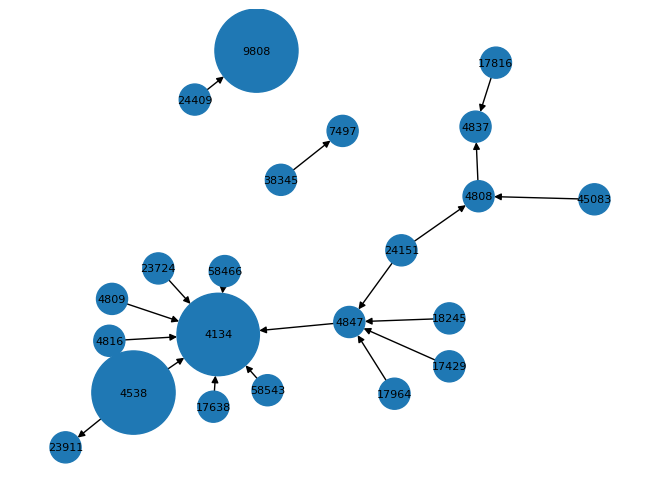

C:\Users\Anne\AppData\Local\Temp\ipykernel_22868\1451530128.py:17: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(usas_graph, pos=nx.nx_pydot.graphviz_layout(usas_graph), node_size=node_weight,font_size=6, with_labels=False, arrows=True)


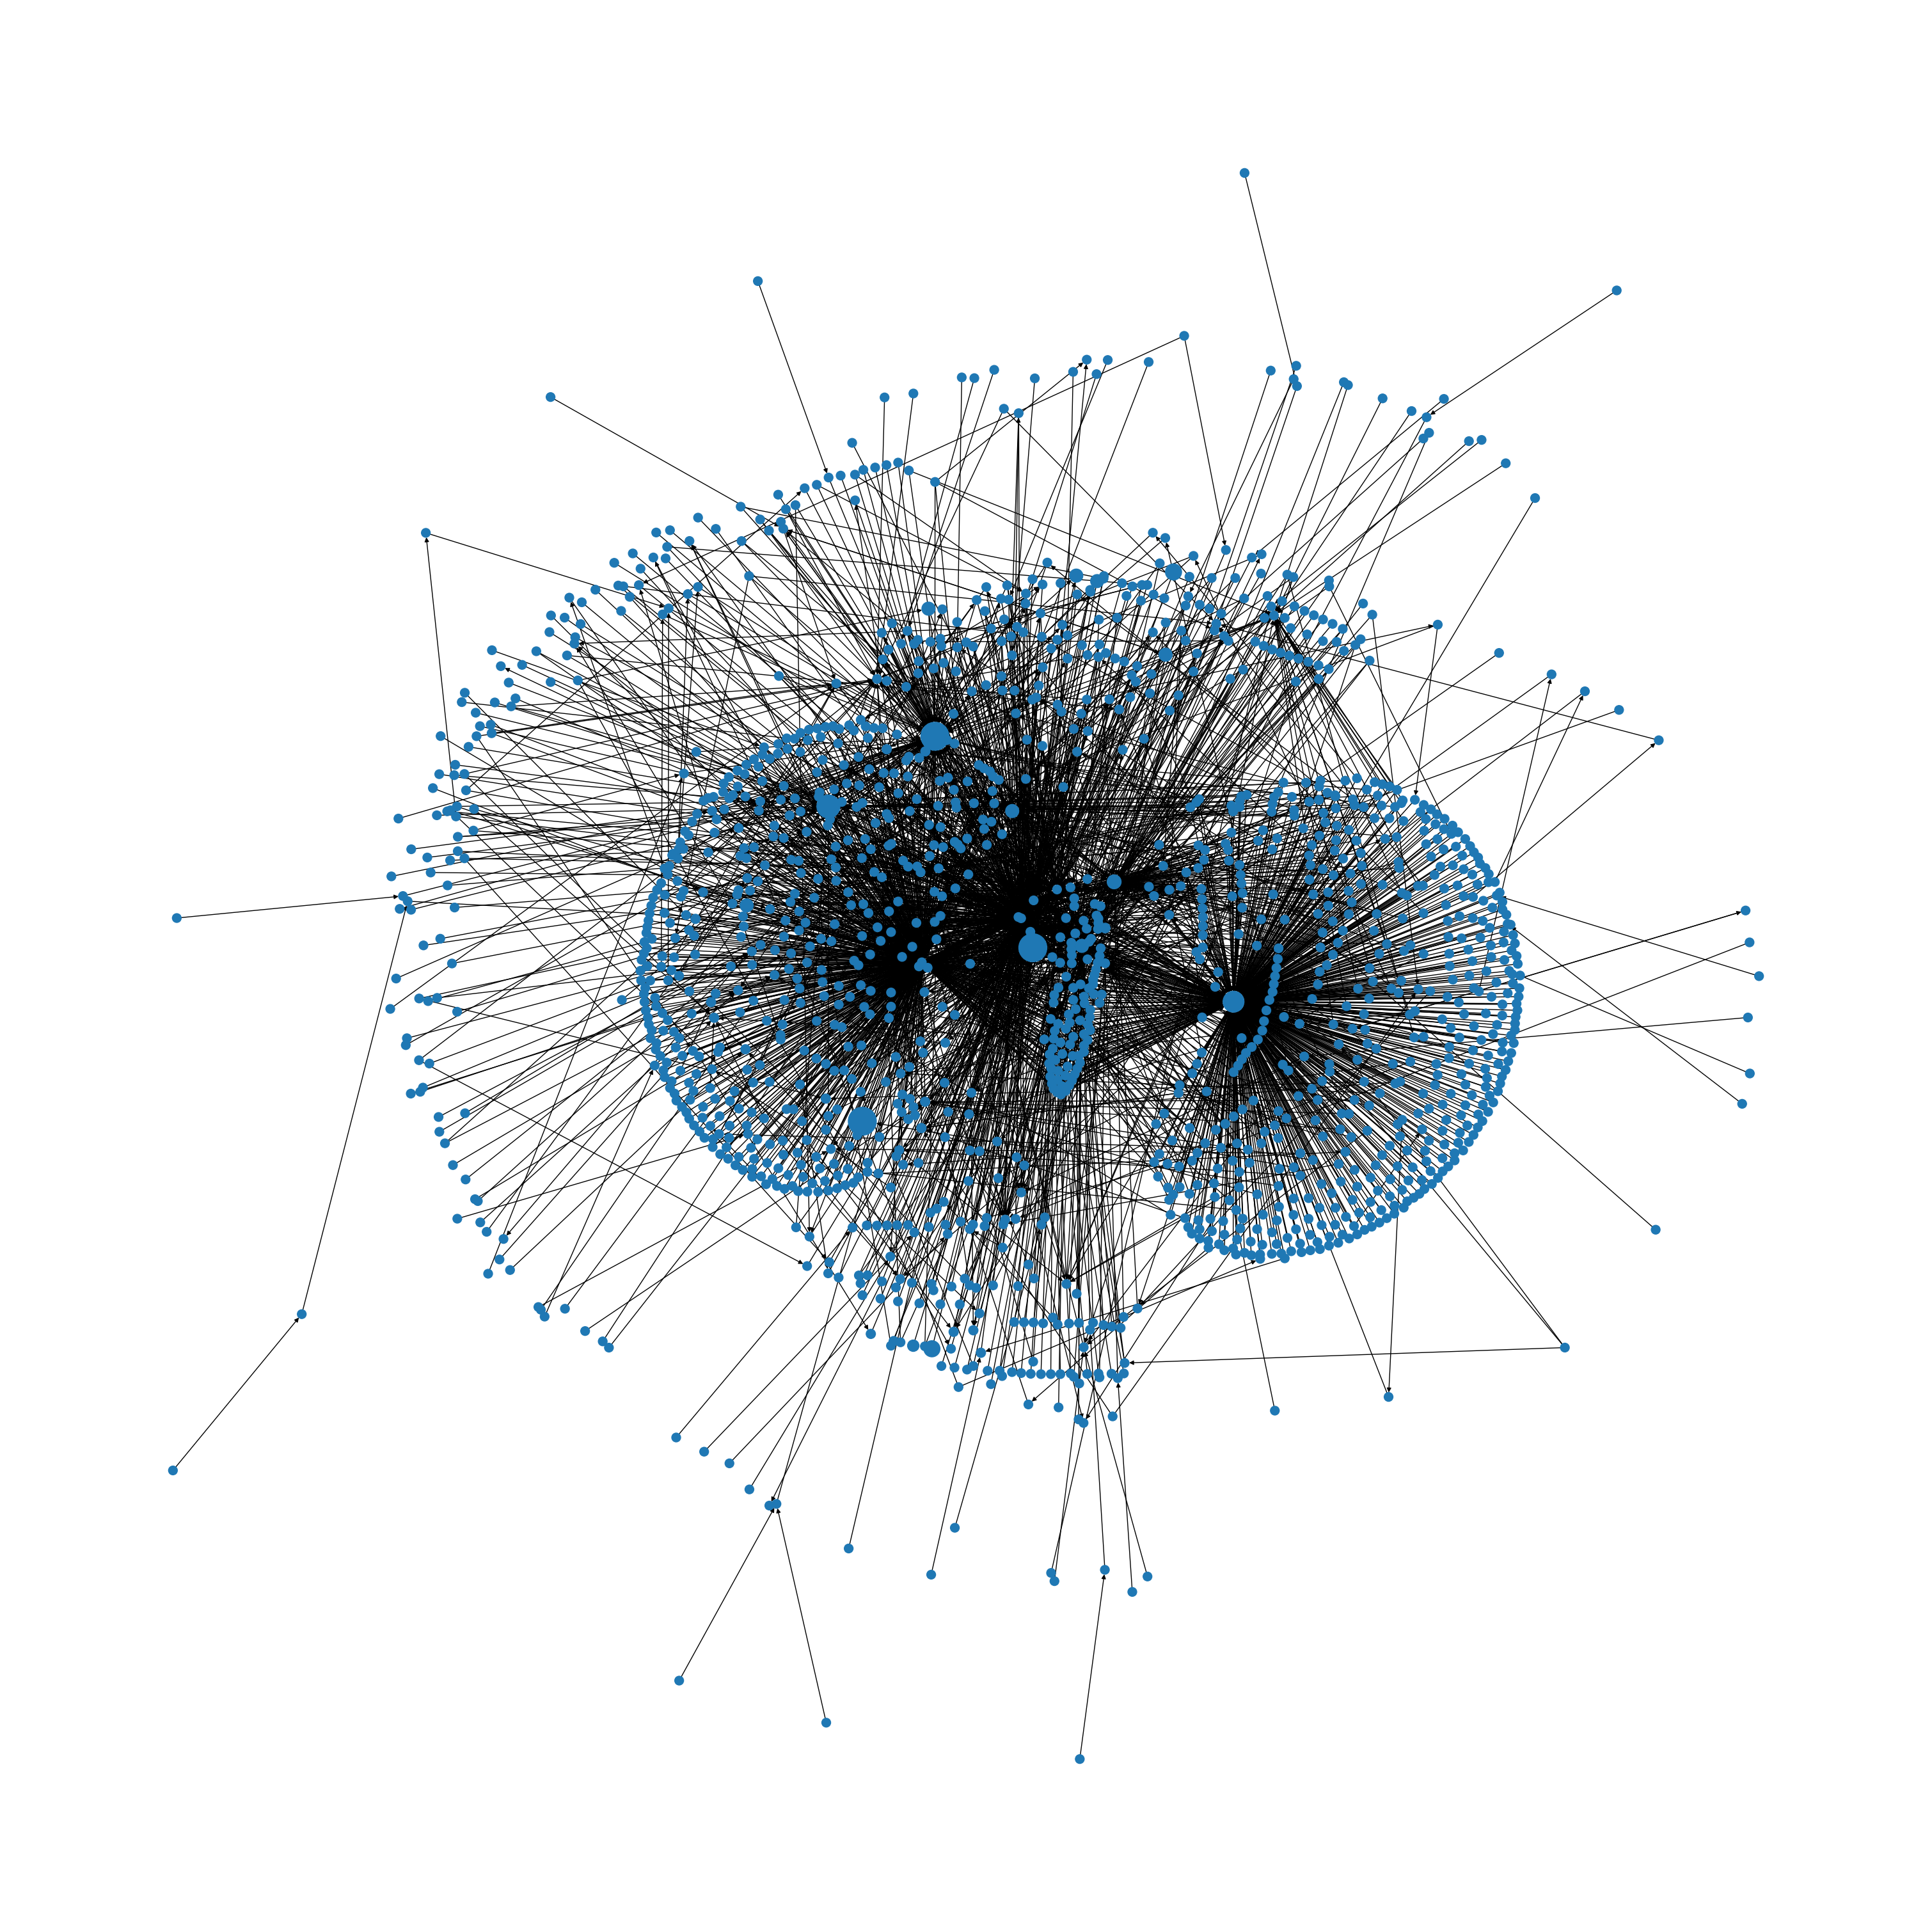

In [65]:
# from networkx.drawing.nx_agraph import graphviz_layout
usas_graph = nx.DiGraph()
f = open('2015-08-01.txt', 'r')
for line in f:
    # print(line)
    oneLine = line.split(',')
    # print(len(oneLine))
    A = oneLine[0].strip()
    B = oneLine[1].strip()
    if len(oneLine) == 2:
        if A in usDict.keys() and B in usDict.keys():
            usas_graph.add_edge(A, B)
            usas_graph.nodes[A]['weight'] = usDict[A]
            usas_graph.nodes[B]['weight'] = usDict[B]
node_weight = [max(100,min(1000,v/5000000000)) for v in list(nx.get_node_attributes(usas_graph, 'weight').values())]
plt.figure(figsize=(30,30))
nx.draw(usas_graph, pos=nx.nx_pydot.graphviz_layout(usas_graph), node_size=node_weight,font_size=6, with_labels=False, arrows=True)

# 显示图形
plt.show()